In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\TATASTEEL.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,55.494999,55.779999,52.935001,55.384998,47.281101,140703330
1,2018-11-01,55.580002,56.389999,55.400002,55.660000,47.515865,54690570
2,2018-11-02,56.099998,58.240002,56.064999,57.404999,49.005539,79794570
3,2018-11-05,57.400002,58.360001,56.750000,57.744999,49.295792,45358560
4,2018-11-06,57.959999,58.439999,57.000000,57.575001,49.150665,39102740


In [3]:
new_df = df.set_index('Date')
new_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,55.494999,55.779999,52.935001,55.384998,47.281101,140703330
2018-11-01,55.580002,56.389999,55.400002,55.660000,47.515865,54690570
2018-11-02,56.099998,58.240002,56.064999,57.404999,49.005539,79794570
2018-11-05,57.400002,58.360001,56.750000,57.744999,49.295792,45358560
2018-11-06,57.959999,58.439999,57.000000,57.575001,49.150665,39102740
...,...,...,...,...,...,...
2023-10-23,123.349998,123.400002,119.699997,120.000000,120.000000,30699479
2023-10-25,121.199997,122.800003,120.750000,121.349998,121.349998,27346103
2023-10-26,120.849998,120.900002,118.900002,119.900002,119.900002,36298907


In [4]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(df['Close'])

In [6]:
results = model.fit(smoothing_level = 0.4, optimized = False)
results.summary()

Dep. Variable:,Close,No. Observations:,1235
Model:,SimpleExpSmoothing,SSE,8007.634
Optimized:,False,AIC,2312.616
Trend:,None,BIC,2322.853
Seasonal:,None,AICC,2312.648
Seasonal Periods:,None,Date:,"Fri, 17 Nov 2023"
Box-Cox:,False,Time:,22:25:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4000000,alpha,False
initial_level,55.384998,l.0,False


In [7]:
forecast = results.forecast(steps = 15)

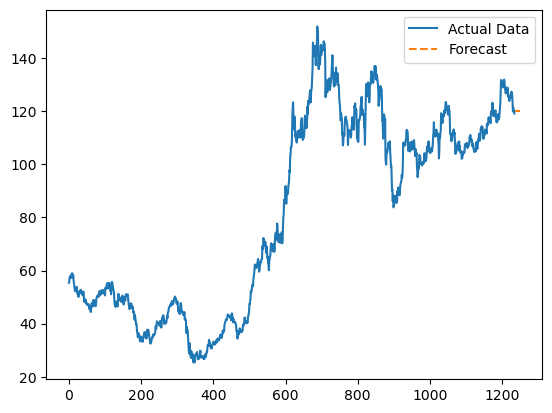

In [8]:
plt.plot(df['Close'], label = 'Actual Data')
plt.plot(forecast, label = 'Forecast', linestyle = 'dashed')
plt.legend()
plt.show()